Reference for theory: https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [35]:
import pandas as pd

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC

In [39]:
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')

In [40]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [41]:
data.shape

(400, 4)

Splitting the test and train data (70% train and 30% test)

In [42]:
 data_train, data_test = train_test_split(data,test_size=0.3, random_state=1)

In [43]:
data_train.shape

(280, 4)

In [44]:
data_test.shape

(120, 4)

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 39 to 37
Data columns (total 4 columns):
admit    280 non-null int64
gre      280 non-null int64
gpa      280 non-null float64
rank     280 non-null int64
dtypes: float64(1), int64(3)
memory usage: 10.9 KB


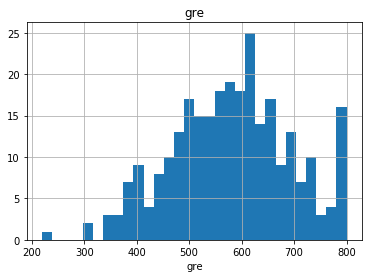

In [46]:
data_train.hist(column = 'gre', bins = 30)
plt.xlabel('gre',fontsize = 10)
plt.show()

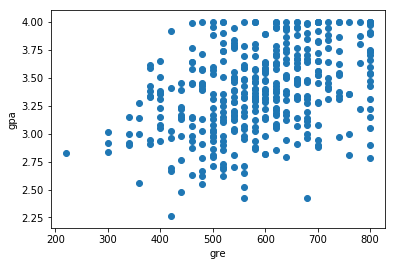

In [47]:
plt.scatter(data['gre'], data['gpa'])
plt.xlabel('gre',fontsize = 10)
plt.ylabel('gpa',fontsize = 10)
plt.show()

gre    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

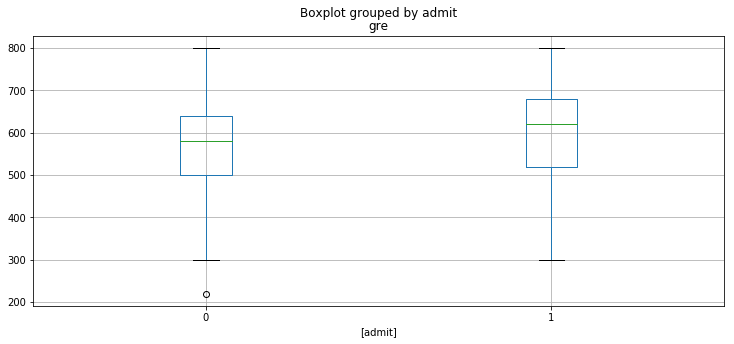

In [48]:
dum = data_train[['admit','gre']]
fig, axes = plt.subplots(ncols=1, figsize=(12, 5), sharey=True)
dum.query("admit in [1, 0]").boxplot(by = 'admit', return_type = 'axes', ax = axes)

In [49]:
data_train.head()

,admit,gre,gpa,rank
39,1,520,2.68,3
167,0,720,3.77,3
383,0,660,4.00,1
221,0,680,3.99,3
351,0,620,3.43,3


In [50]:
x_train = data_train[['gre','gpa','rank']]
x_test = data_test[['gre','gpa','rank']]

y_train = data_train[['admit']]
y_test = data_test[['admit']]

Here I used both 'liblinear' solver and 'lbfgs' solver for logistic regression bbut in practice you can use any one of them

In [51]:
LR1 = linear_model.LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr',penalty='l1', C=0.1)

In [52]:
LR2 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',penalty='l2', C=0.1)

In [53]:
LR1.fit(X=x_train, y=y_train)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
LR2.fit(X=x_train, y=y_train)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_pred1 = LR1.predict(x_test)
y_pred2 = LR2.predict(x_test)

In [56]:
#Accuracy 
score1 = LR1.score(x_test, y_test)
print(score1)
cm1 = metrics.confusion_matrix(y_test, y_pred1)
print(cm1)

0.725
[[81  1]
 [32  6]]


In [57]:
#Accuracy 
score2 = LR2.score(x_test, y_test)
print(score2)
cm2 = metrics.confusion_matrix(y_test, y_pred2)
print(cm2)

0.7333333333333333
[[79  3]
 [29  9]]


In [58]:
print(np.mean(y_train))
print(1 - np.mean(y_train))

admit    0.317857
dtype: float64
admit    0.682143
dtype: float64


In [59]:
data_train['log_gpa'] = np.log(data_train['gpa'])
data_train['log_gre'] = np.log(data_train['gre'])

data_test['log_gpa'] = np.log(data_test['gpa'])
data_test['log_gre'] = np.log(data_test['gre'])

C:\Users\param\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\param\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\param\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [60]:
data_train.head()

,admit,gre,gpa,rank,log_gpa,log_gre
39,1,520,2.68,3,0.985817,6.253829
167,0,720,3.77,3,1.327075,6.579251
383,0,660,4.00,1,1.386294,6.492240
221,0,680,3.99,3,1.383791,6.522093
351,0,620,3.43,3,1.232560,6.429719


In [61]:
data_test.head()

,admit,gre,gpa,rank,log_gpa,log_gre
398,0,700,3.65,2,1.294727,6.551080
125,0,540,3.38,4,1.217876,6.291569
328,0,580,3.34,2,1.205971,6.363028
339,1,660,3.47,3,1.244155,6.492240
172,0,680,3.48,3,1.247032,6.522093


In [62]:
#feature engineering for better accuracy 

x_train = data_train[['log_gre','log_gpa','rank']]
x_test = data_test[['log_gre','log_gpa','rank']]

y_train = data_train[['admit']]
y_test = data_test[['admit']]

In [63]:
LR1.fit(X=x_train, y=y_train)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
LR2.fit(X=x_train, y=y_train)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [65]:
y_pred1 = LR1.predict(x_test)
y_pred2 = LR2.predict(x_test)

In [66]:
#Accuracy 
score1 = LR1.score(x_test, y_test)
print(score1)
cm1 = metrics.confusion_matrix(y_test, y_pred1)
print(cm1)

0.6833333333333333
[[82  0]
 [38  0]]


In [67]:
#Accuracy 
score2 = LR2.score(x_test, y_test)
print(score2)
cm2 = metrics.confusion_matrix(y_test, y_pred2)
print(cm2)

0.6916666666666667
[[82  0]
 [37  1]]
